# Classes and Objects
Our week 3 lesson workbook, available on Github from the powderflask/cap-comp215 repository.

As usual, the first code block just imports the modules we will use.

In [54]:
import math
import random
from collections import defaultdict
from dataclasses import dataclass
import matplotlib.pyplot as plt
from pprint import pprint

### Everything in `python` is an `object`!
  * and every `object` has a `type`!
    * use `type(object)` to learn the type of an object
    * a `class` is used to define a `type`!
  * even a `function` is an `object` !!
  * an `object` has attributes, you can just add new attributes to any object (but don't!)

A little code to demonstrate...

In [27]:
# demo code
type(42)
type("hello")
type(True)

from types import SimpleNamespace
student = SimpleNamespace(name = "Henry", id=1234567890)
type(student)
type(int)
type(type)

type

In [28]:
s = "hello world"
s.split()
len(s)

str.split

<method 'split' of 'str' objects>

## Problem: Collision detection using circles
A `class` is just a collection of `functions` that all work on the same piece of `data structure`.

The `data structure` is defined by the class's `instance variables`.

Easiest to understand if we do an example - let's define a `Circle` object type...

In [57]:
@dataclass
class Circle:
    """ Representation for the data and operations on a circle """
    x: int
    y: int
    r: float

    def __str__(self) -> str:
        """ Return a string representation of the Circle """
        return f"Circle radius {self.r} at ({self.x},{self.y})"

    def area(self) -> float:
        """ Return the area of this circle """
        return math.pi * (self.r**2)

    def move(self, offset:tuple[int,int]):
        """ Move this circle by given (x,y) offset """
        self.x += offset[0]
        self.y += offset[1]

    def distance(self, other:"Circle"):
        """ Return the distance between this circle and the other one """
        return math.sqrt((self.x-other.x)**2 + (self.y-other.y)**2)

    def intersects(self, other:"Circle"):
        """ Return True iff this circle intersects the other one """
        return self.distance(other) <= (self.r + other.r)


In [58]:
# Test Circle class

c = Circle(5,9,42)
str(c)
c.area()
c.move([1,-1])
str(c)
c2 = Circle(7,7,9)
c.distance(c2)
c.intersects(c2)
c3 = Circle(20,20,9)
c2.intersects(c3)

False

## Problem:  Counting
When conducting an experiment, it is common to count occurances.  For example

* in a physics experiment, we might count the number of atomic collisions in which certain sub-atomic particles were produced
* in biology, we might count the number of cells infected by a virus after a fixed time period
* in a computational experiment, we might count the frequency with which clusters of a give size form

To visualize such experimental results, we would generally plot a histogram, like this:


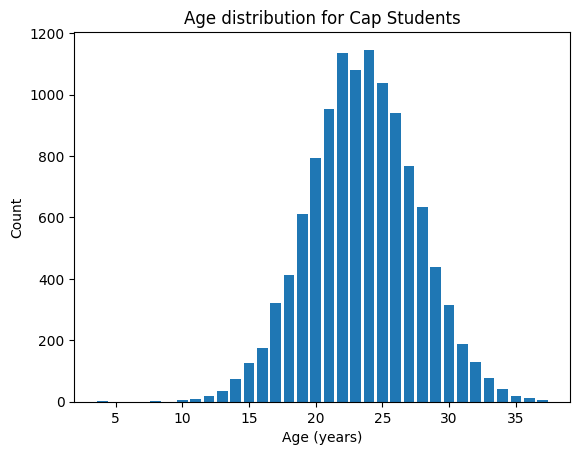

In [31]:
# Experiment: Get the age distribution for Cap students
n_cap_students = 11500

# Simulate getting the age for one Cap student
def get_age(student_id):
    return int(random.normalvariate(mu=24, sigma=4))  # Normally distributed age with mean of 24 years

# Run experiment to obtain the age for each student
data = [get_age(id) for id in range(n_cap_students)]

# count the number of students in each age class
histogram = {}
for age in data:
    histogram[age] = histogram.get(age, 0) + 1

# configure a plot to draw the bar chart in
_, ax = plt.subplots()
ax.set(
    title="Age distribution for Cap Students",
    xlabel='Age (years)',
    ylabel='Count',
)

# plot a histogram of the data, divided into n "equal width" bins
ax.bar(histogram.keys(), histogram.values())
plt.show()

## Custom Histogram Class

Define our own historgram class that serves as a "wrapper" for clunky pyplot ax.hist

In [32]:
class Histogram:
    """ A simple histogram with a nice API """
    def __init__(self, title, xlabel='Categories', ylabel='Count'):
        _, ax = plt.subplots()
        ax.set(
            title=title,
            xlabel=xlabel,
            ylabel=ylabel,
        )
        self.ax = ax
        self.counts = {}

    def count(self, category):
        self.counts[category] = self.counts.get(category, 0) + 1

    def plot(self):
        self.ax.bar(self.counts.keys(), self.counts.values())
        plt.show()

### The Power of Abstraction

The real benefits appear when we go to use this class to solve the original problem.

Notice how creating an "abstraction" for a histogram makes it much easier to understand what the computation is doing.  Also notice, the class is "reusable" - we can now deploy this abstraction any time we need a histogram!

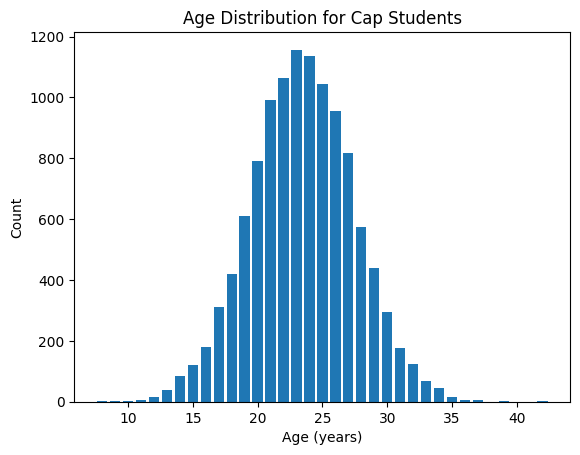

In [33]:
hist = Histogram(title='Age Distribution for Cap Students', xlabel='Age (years)')
for id in range(n_cap_students):
    hist.count(get_age(id))
hist.plot()